# **Zomato Data Analysis Project**

**Step 1 -> importing libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2 -> Create a dataframe of a csv file**

In [4]:
df = pd.read_csv('Zomato_data.csv')
df                              # for seeing our DataFrame

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


**Step 3 -> Clean the Data**

*we have to check the data is proper or not and its 
summary*

In [ ]:
as we see in our data column 'rate' has its data type object which can be hurdle for our analysis so we
can make the data type into float and remove /5 from the column

In [6]:
# 1) change the data type of 'rate' column
def handleRate(value):
  value = str(value).split('/')       # With the help of split, all the values after it will be removed
  value = value[0]
  return float(value)

df['rate'] = df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [9]:
df.info()                        # for checking data types of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [7]:
# 2) now check the shape of our DataFrame
df.shape 

(148, 7)

In [8]:
# 3) now we will check that in our data there is any duplicate row or not
df.duplicated().sum()

np.int64(0)

In [10]:
# so we dont have any duplicate row
# 4) so we directly go to check that in our data is any null value is present or not 

df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [ ]:
so our data is tottaly fine and proper now we can perform the questions on this data

 # we have some questions which we have to perform on this project 


1. What type of restaurant do the majority of customers order from ?
2. How many votes has each type of restaurant received from customers ?
3. what are the ratings that the majority of restaurant have received ?
4. Zomato has observed that most couples order most of their food online. What is their avarage spending on each order ?
5. Which mode (online or offline) has received the maximum rating ?
6. Which type of restaurant received more offline orders, so that Zomato can 



**1. What type of restaurant do the majority of customers order from ?**

C:\Users\yuvra\AppData\Local\Temp\ipykernel_10952\2444753093.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'listed_in(type)', data = df, palette="coolwarm", edgecolor = 'black')


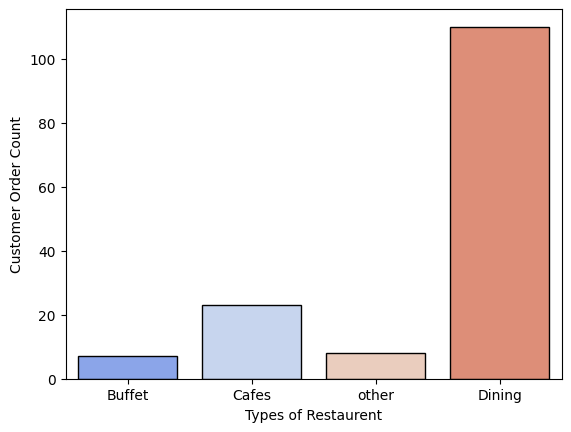

In [11]:
sns.countplot(x= 'listed_in(type)', data = df, palette="coolwarm", edgecolor = 'black')
plt.xlabel('Types of Restaurent')
plt.ylabel('Customer Order Count')
plt.show()

Conclusion -> majority of the restaurent falls in Dining Catogory

**2. How many votes has each type of restaurant received from customers ?**

In [14]:
groupedData = df.groupby('listed_in(type)')['votes'].sum()        # we have to sum of all votes on the basis of types
result = pd.DataFrame({'votes' : groupedData})
result.head()

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


C:\Users\yuvra\AppData\Local\Temp\ipykernel_10952\3101867268.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'listed_in(type)', y = 'votes', data = result, palette="viridis", edgecolor = 'red')


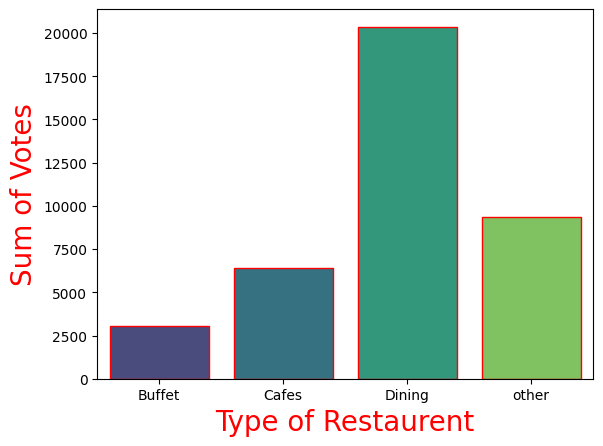

In [15]:
sns.barplot(x = 'listed_in(type)', y = 'votes', data = result, palette="viridis", edgecolor = 'red')
plt.xlabel('Type of Restaurent', c = 'red', size = 20)
plt.ylabel('Sum of Votes', c = 'red', size = 20)
plt.show()

conclusion - dining restaurent has received maximum votes and the lowest is buffet type restaurent

**3. what are the ratings that the majority of restaurant have received ?**

*To understand, I will create a histogram so that I can find out which range of ratings is the most frequent.*

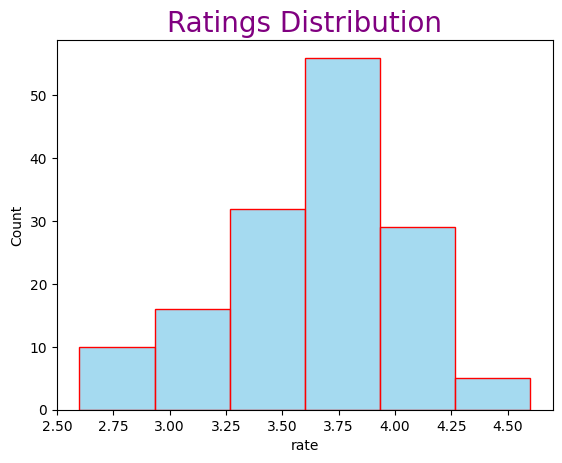

In [16]:
sns.histplot(x = 'rate', data = df, bins = 6, edgecolor = 'red', color = 'skyblue')
plt.title('Ratings Distribution', c = 'purple', size = 20)
plt.show()

conclusion - The majority restaurents recieved ratings from 3.6 to 3.9

**4. Zomato has observed that most couples order most of their food online. What is their avarage spending on each order ?**

Now, to analyze how much two people spend the most frequently in their orders, I will use a count plot for this comparison.

C:\Users\yuvra\AppData\Local\Temp\ipykernel_10952\1331212262.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'approx_cost(for two people)', data = df, palette="viridis")


[]

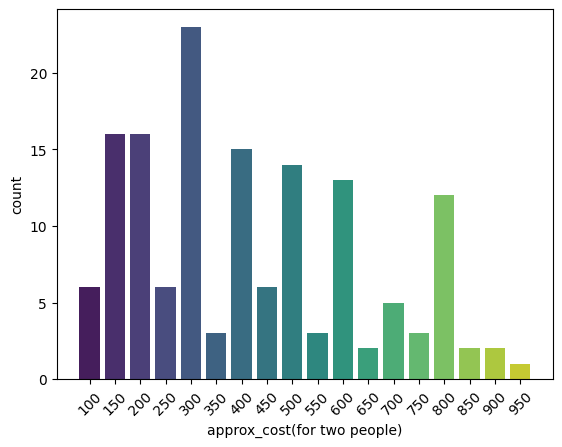

In [17]:
sns.countplot(x = 'approx_cost(for two people)', data = df, palette="viridis")
plt.xticks(rotation = 45)            # Rotate labels by 45 degrees
plt.plot()

The x-axis labels were overlapping due to high density, so I rotated them for better readability.

Conclusion - the majority of couples prefer resturants with an approximate cost of 300 rupees

**5. Which mode (online or offline) has received the maximum rating ?**

we will do this question in 2 ways first in box plot and second in piechart

C:\Users\yuvra\AppData\Local\Temp\ipykernel_10952\1910317839.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'online_order', y = 'rate', data = df, palette=['lightblue', 'lightgreen'])


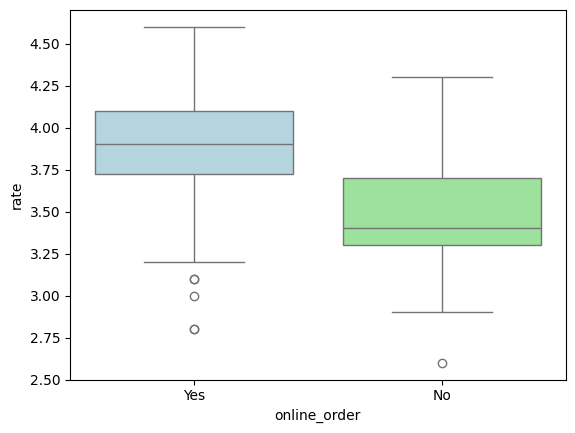

In [20]:
# first way
sns.boxplot(x = 'online_order', y = 'rate', data = df, palette=['lightblue', 'lightgreen'])
plt.show()

Conclusion - Offline order received lower ratings in comparison to online order

Now i do pie chart 

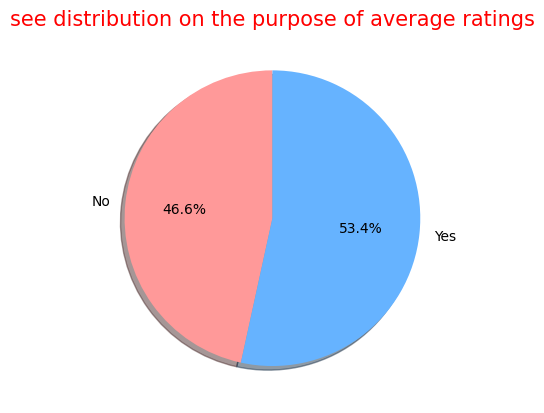

In [25]:
# second way
groupedData2 = df.groupby('online_order')['rate'].median()
plt.pie(groupedData2, labels = groupedData2.index, autopct = '%2.1f%%', shadow = True, startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('see distribution on the purpose of average ratings', c= 'red', size = 15)
plt.show()

- We use groupby('restaurant_type') to separate data into online/offline groups, then calculate their average ratings. The .index extracts the group names (online, offline) for labeling the pie chart. This helps visually compare their performance.
- conclusion - the average ratings of online order is high than offline order

**6. Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers ?**

For this, we will use a heatmap to determine which type of restaurant (online/offline) has more offline orders.

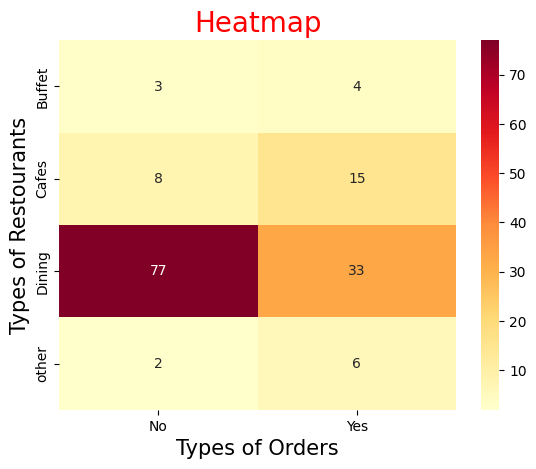

In [27]:
pivot_table = df.pivot_table(index = 'listed_in(type)',
                             columns = 'online_order',
                             aggfunc='size',                             # Counts the number of occurrences (orders) in each group.
                             fill_value=0)
sns.heatmap(pivot_table,annot = True, cmap = 'YlOrRd')
plt.title('Heatmap' , c = 'red', size = 20)
plt.xlabel('Types of Orders', size = 15)
plt.ylabel('Types of Restourants', size = 15)
plt.show()

*This code analyzes how often restaurants receive online vs. offline orders across different categories (e.g., "Cafe," "Delivery").*

**pivot_table**

Rows: Restaurant types (listed_in(type)).

Columns: Order type (online_order = Yes/No).

Values: Count of orders (aggfunc='size').

Missing data is set to 0 (fill_value=0).

**heatmap**

Visualizes the data with colors (darker = more orders).

Numbers are shown (annot=True) for clarity.

**Insight: Reveals which restaurant types rely more on online/offline orders (e.g., "Delivery" favors online).**

### Conclusion - Dining restro primarily accept offline orders, whereas cafes primarily receive online order. This suggests that client prefer to place orders in person at restro, but prefer online ordering at cafes.